# A Quantum Particle in a Box

Welcome to the Jupyter Notebook of Lecture 5. We will here apply the method outlined in the lecture to solve a second order differential equation with boundary condition.






### Numerically Solving the Schrödinger Equation

In this Python notebook, we will work on finding a purely numerical solution to the time independent Schrödinger Equation (SE). 

$$ -\frac{\hbar^2}{2m}\frac{d^2}{d x^2} \psi(x) + V(x)\psi(x) = E\psi(x)$$

where $\hbar$ is the Planck constant, $m$ is the mass of the particle, $E$ is the energy of the particle, $V(x)$ is the potential. For simplicity, we express the energy and potential in units of $\frac{\hbar^2}{2m}$, and simplifies within this notebook to:

$$ -\frac{d^2}{d x^2} \psi(x) + V(x)\psi(x) = E\psi(x)$$

As mentioned in the lecture, we use infinite energy barrier at $x=0$ and $x=5$ that model the effect of the "box", e.g. the particle can not tunnel through the walls. 
The potential is zero otherwise, and the problem simplifies to:

$$ \frac{d^2}{d x^2} \psi(x)  = -  E\psi(x)$$

With the conditions: 

$$ \psi(x=0)=\psi(x=5)=0 $$

Note that this notebook can easily be modified for any other potential you would like to try.






We build upon on our previous Notebook, where we used a simple decomposition to decouple this second order differential equation to two coupled differential equations. Firstly, let us rename the solution of the Schrodinger equation $y(x)=\psi(x)$, to make a connection with the notations used in the case of the pendulum. 


We introduce an auxiliary function $z(x)$, defined as:

$$ \frac{d}{d x} y(x)  = z(x)$$

and the problem can be rewritten as:

$$ \frac{d}{d x} z(x)  = -  E y(x)$$









We apply now the Taylor method to the case of this system of coupled first order differential equations. 

Recall that we implemented in the last notebook both the Taylor's method and a semi-implicit algorithm, obtained by a simple modification of the method (the Cromer method). We will modify the function that you have implemented in the last notebook,  and apply it to the case of this new system of equations.


### Exercice 1: Solving the particle in the box

In this exercise, you will use the this Jupyter Notebook to experiment with various model parameters and settings. You should understand the code and how it works. Notice that it is organized into distinct sections: preamble, parameter declaration, and model code. This provides a good coding practice, as to streamline your program. 

Here we define the code for our model in the lecture. This is primarily composed of a single function, which we will call "particle". We must:

1) Load any modules required

2) Define any fixed parameters that would not change (in this example the length of the box)

3) Define a list of arguments that can be specified by the user. We must set default values for these parameters.

4) Define a list of initial conditions for our model. We must also specify these in the calling arguments so that the user can change them. We must set default values for these parameters.

5) Write documentation for our function that describes what it does and what the arguments are.

6) Create the structures that are required for our model to run

7) Set the initial conditions

8) Set the boundary conditions (if any)

9) Integrate our model, with ideally a choice of the Taylor's approach, or the small
modification provided by the Cromer's approach


We start by importing the relevant modules.


## Issues plotting with MatplobLib in S5.33 

Many students have reported issues with matplotlib, and plotting in general. 
The line : `%matplotlib notebook` is causing issues due to some mismatch of
library versions.

You can comment out this line, but  matplotlib will not include your plots within this notebook, which will provide issues for the submission of your reports.

The college IT service has suggested that you follow the following steps before
proceeding:

- open a terminal in unix

- type the following command in the terminal : `conda activate`

- open Jupyter Notebook again, check if Matplotlib now functions propery

- before logging out, type in the terminal : `conda deactivate`

Please let us know if this solves the problem or generates further issues.



In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

### Aim and shoot method 

In this problem we need to account for the boundary condition. In the case of the pendulum, two initial conditions are provided for $t=0$ ($x=0$ in our notations for the particle in the box), for conditions typically are:

$$ y(x=0)  = ... $$

$$ z(x=0) = y'(x=0) = ... $$

#### Question: 

what conditions shall we use for the particle in the box? 



Answer:
$z = 1\\
x = 0$

Furtheremore, we have now an additional variable, the energy of the particle $E$, and need to satisfy the constraint:

$$y(x=5)=0$$

For a given energy $E$, we will either satisfy this condition, or obtain a non-zero $y(x=5)$. We aim at calculating the obtained values of $y(x=5)$ by solving the Schrodinger differential equation for several choices of the energy $E$. 




## Modifying the pendulum function

Modify the following function to account for the novel elements :

- the function should take the energy $E$ as an argument, add the energy as an argument with a chosen default value

- the function should return the solution of the differential equation evaluated at x=5




In [19]:
def particle(l=5, dx=0.01, cromer=False, z0= 1, y0= 0, E=0):

    xstart=0
    xend=l
    # Create the variables to store our results
    distance=np.arange(xstart, xend+dx, dx)  # Create the array of model positions
    Nx=len(distance)                         # Number of steps
    z=np.zeros(Nx)                    # Add a comment.....sure 
    y=np.zeros(Nx)                    # Add a comment.....

    # Set our initial conditions
    z[0]= z0
    y[0]= y0

    # Loop over all of our times and integrate the model
    for n in range(Nx-1):
        
        # derivative of the wave-function
        z[n+1] = z[n] + dx *(-E*y[n])

        # If we are using 'Taylor' or 'Cromer"
        if cromer:
            y[n+1]=y[n] + dx*z[n+1]
        else:
            y[n+1]=y[n] + dx*z[n]

    boundary = l
    
    return distance, y, z, boundary

### Solving the differential equation


Fill in the blanks in the "particle" solver. 

Using the default parameters, run the model and make three plots:

plot the quantum wave-function obtained for an energy $E=1$

plot the derivative of the wave-function 





<IPython.core.display.Javascript object>


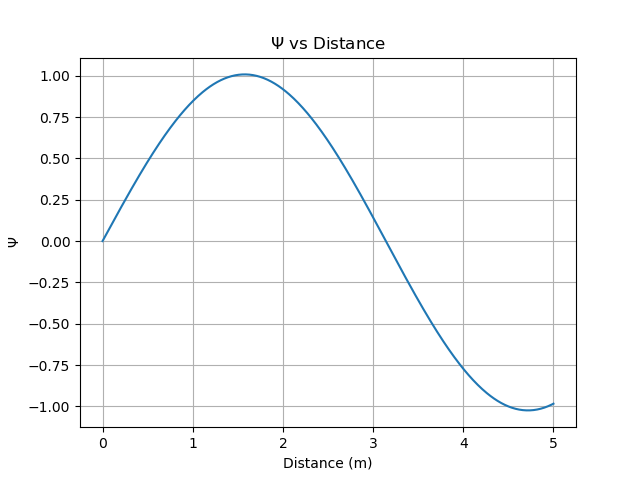

<IPython.core.display.Javascript object>


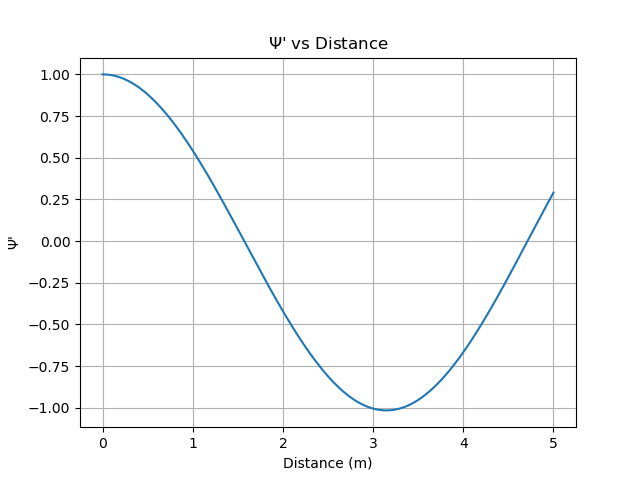

0

In [111]:
import matplotlib.pyplot as plt
import numpy as np

def simplot(x = [1], y = [1], xlabel = "none", ylabel = "none", title = "none", fig = 0, **kwargs):
    for key, value in kwargs.items():
        if key == "label":
            if value == "PvsD":
                xlabel = "Distance (m)"
                ylabel = r'$\Psi$'
                title = r'$\Psi$'" vs Distance"
            if value == "PpvsD":
                xlabel = "Distance (m)"
                ylabel = r'$\Psi$'"'"
                title = r'$\Psi$'"' vs Distance"

    plt.figure(fig)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x, y)
    return 0

temp=particle(E=1)
simplot(temp[0], temp[1], fig = 0, label = "PvsD")
simplot(temp[0], temp[2], fig = 1, label = "PpvsD")

## Question: 

Plot the solution obtained for the argument $z0=0$, what do you obtain? How can you explain this behavior?


<IPython.core.display.Javascript object>


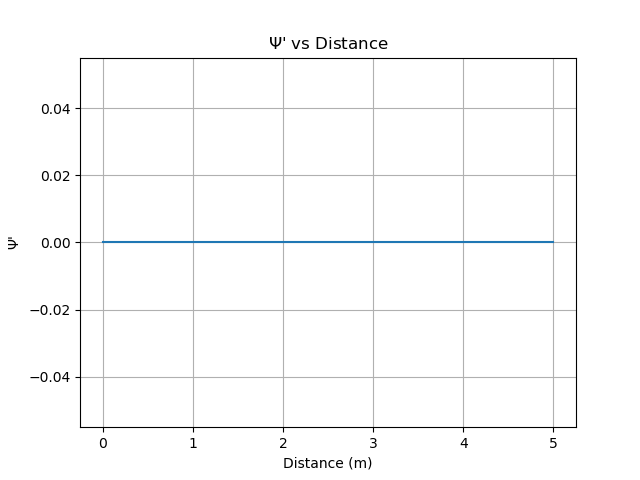

0

In [21]:
import matplotlib.pyplot as plt
import numpy as np

temp=particle(z0=0)
simplot(temp[0], temp[2], label = "PpvsD", fig = 2)


Answer : 
    Because y0 = 0 and E = 0

### Question: 

Use the "particle" function obtained above to calculate the value of the wave-function y(x) obtained at the boundary, and plot the obtained quantity for a linear mesh of 100 energies between $E=0$ and $E=10$.







<IPython.core.display.Javascript object>


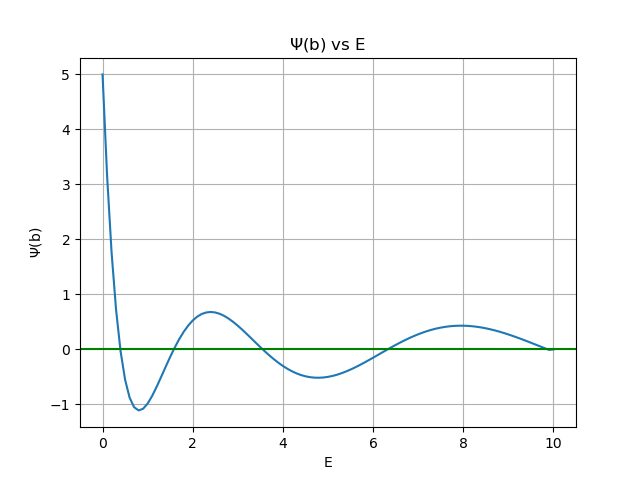

In [112]:

Estart=0
Eend=10
dE=Eend/100

Emesh = np.arange(Estart, Eend+dE, dE)                

# Loop over all Energies
def y_at_boundary(Emeshy, L = 5):
    b=np.zeros(len(Emeshy))
    for i in range(len(Emeshy)-1):
        b[i] = particle(l = L, E = Emeshy[i])[1][-1]
    return b

# Plot boundary as function of energies

b = y_at_boundary(Emesh)
simplot(Emesh, b, xlabel = "E", ylabel = r'$\Psi$'"(b)", title = r'$\Psi$'"(b) vs E", fig = 3)
plt.axhline(y=0, xmin=0, xmax=10, color='green')




## Finding zeros of a function

We obtained now the boundary condition as function of the particle energy $E$.

Only the energy that satisfy the boundary condition $y(x=5)=0$ are hence physical. To extract the quantized energies, we need to estimate the zeros of the array obtained above.

We propose a strategy based on identifying a zero by flagging changes of signs of the function. If `boundary[i]` is the array calculated above (the wave-function obtained at the boundary x=5, for a given energy E[i]) : 

- if the product `boundary[i] * boundary[i-1] < 0`, we obtain a new possible energy 

- we use a counter to append this new energy to the list of physical energies



In [113]:
Estart=0.01
Eend=100
dE=Eend/1000

Emesh = np.arange(Estart, Eend+dE, dE)                   

# Loop over all Energies and identify zeros 
def find0(Emeshy, L = 5):
    Ephys = []
    b = y_at_boundary(Emeshy, L = 5)
    for i in range(1, len(Emeshy)-1):
        if (b[i] * b[i-1] < 0 or b[i] == 0):
            Ephys = np.append(Ephys, Emeshy[i])
    return Ephys

## Plotting the wave-function

We have now written a program that identifies the quantum energies.

Extend your code such that you also plot the wave-function y(x), obtained between
x=0 and x=5, for the 5 first physical energies.

Hint: for each detected change of sign of the energy, you can plot the stored wave-function y(x).








<IPython.core.display.Javascript object>


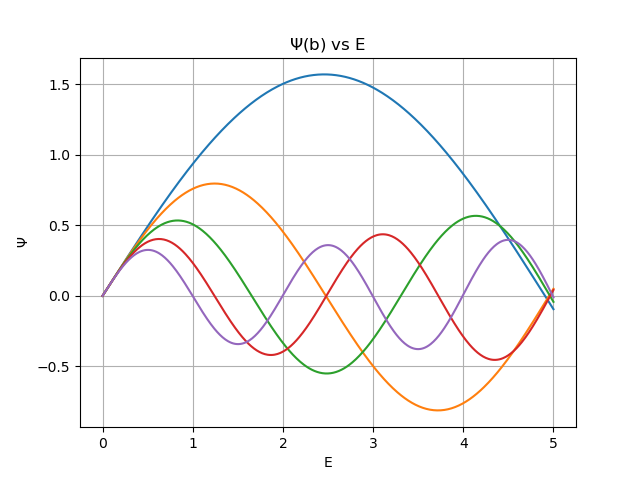

In [114]:
Estart=0.01
Eend=100
dE=Eend/1000

Emesh = np.arange(Estart, Eend+dE, dE) 

NE=len(Emesh)                  
b=np.zeros(NE)


# Loop over all Energies and identify zeros and plot the obtained solutions


Ephys = find0(Emesh)
temp = np.zeros(len(Ephys))

plt.figure(4)
plt.title(r'$\Psi$'"(b) vs E ")
plt.ylabel(r'$\Psi$')
plt.xlabel("E")
plt.grid()
for i in range(0, 5):
    temp = particle(E = Ephys[i])
    plt.plot(temp[0], temp[1])
    


### Question: 

The probability distribution $P(x)$ to observe a particle at position $x$ is 
obtained by the square of the absolute value of the wave-function: $P(x)=\left| \psi \right | ^2(x)$.

Integrate the wave-function obtained for the first energy. Do you satisfy the normalisation condition :

$$\int\limits_{0}^\infty{P(x)dx}=1  $$ 

? 

Hint: you can use the numpy integral function `int = numpy.trapz( y )` 



Showing 5 energies


<IPython.core.display.Javascript object>


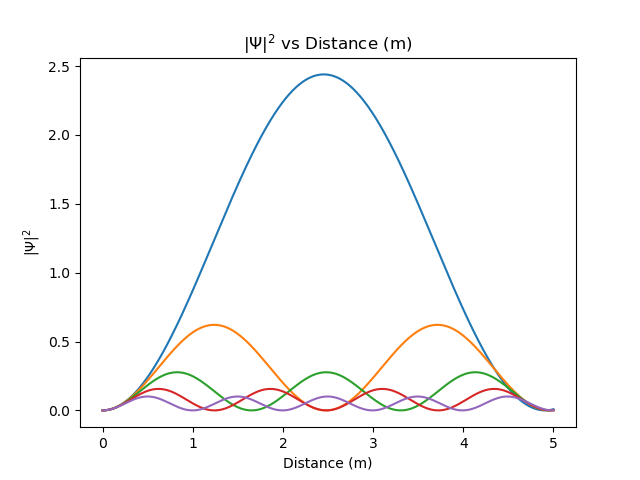

[598.36720305 153.79293274  68.71104353  38.72308789  25.18082891]


<IPython.core.display.Javascript object>


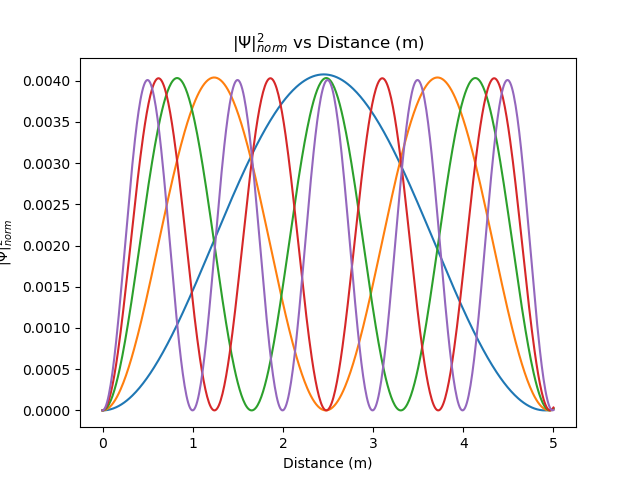

[1. 1. 1. 1. 1.]


In [115]:


Ephys = []
Estart=0.01
Eend=100
dE=Eend/1000

Emesh = np.arange(Estart, Eend+dE, dE) 

# Loop over all Energies and identify zeros and integrate obtained solutions
energynum = 5
print("Showing", energynum, "energies")

Ephys = find0(Emesh)

plt.figure(5)
plt.title(r'$|\Psi|^2$'" vs Distance (m)")
plt.ylabel(r'$|\Psi|^2$')
plt.xlabel("Distance (m)")
inte = []
for i in range(0, energynum):
    temp = particle(E = Ephys[i], cromer = True)
    inte = np.append(inte, np.trapz(y=temp[1]**2))
    plt.plot(temp[0], temp[1]**2)
print(inte)

plt.figure(6)
plt.title(r'$|\Psi|^2_{norm}$'" vs Distance (m)")
plt.ylabel(r'$|\Psi|^2_{norm}$')
plt.xlabel("Distance (m)")
def Prob(Emesh, energynum, L):
    Ephys = find0(Emesh, L = L)
    inte = []
    intnorm = []
    for i in range(0, energynum):
        temp = particle(l = L, E = Ephys[i], cromer = True)
        inte = np.append(inte, np.trapz(y=Ephys[i]*(temp[1])**2))
        plt.plot(temp[0], (Ephys[i]*(temp[1])**2)/inte[i])
        intnorm = np.append(intnorm, np.trapz(y=(temp[1] * np.sqrt(Ephys[i]))**2/inte[i]))
    print(intnorm)


Prob(Emesh, energynum, 5)





### Question: 

What remaining condition, not used yet, could be adapted to obtain a theory that satisfies the normalisation condition ?







Answer :
    Outside the integral multiple by a constant $\frac{E}{\sqrt{\int^\infty_{-\infty} P(x) dx}}$

### Question: 

Obtain the energy spectrum (physical energies) for a larger box, L=100, 
and compare the obtained energy spectra and wave-functions. What is your observation?









[0.395 1.58  3.554 6.32  9.877]


<IPython.core.display.Javascript object>


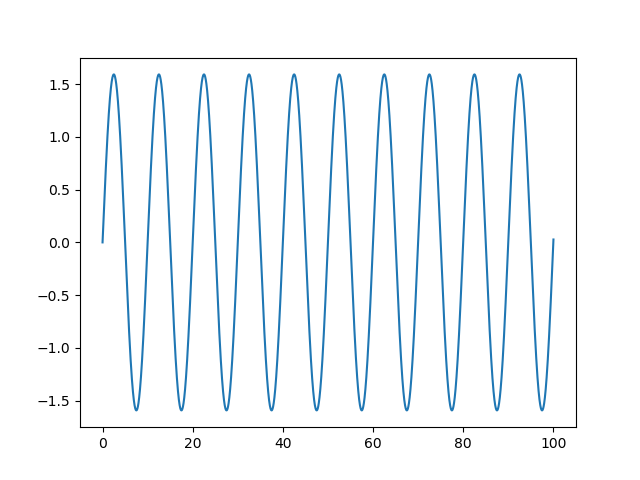

<IPython.core.display.Javascript object>


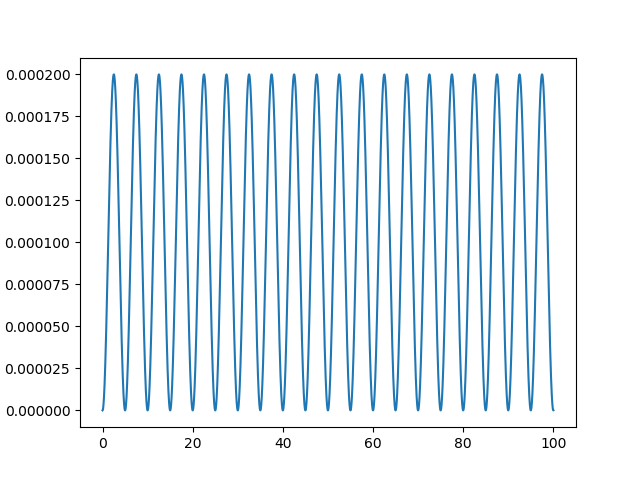

[1.]


In [127]:
Ephys = []
Estart=0.01
Eend=10
dE=Eend/10000

L = 100
energynum = 1

Emesh = np.arange(Estart, Eend+dE, dE)

Ephys = find0(Emesh, L)
b = y_at_boundary(Emesh)
print(Ephys)

temp = 0
for i in range(0, energynum):
    temp = particle(L, E = Ephys[i], cromer = True)
    plt.figure(7)
    plt.plot(temp[0], temp[1])

plt.figure(8)
Prob(Emesh, energynum, L = L)

